# titanic project

In [2]:
from IPython.display import Image
Image(url= "https://images.squarespace-cdn.com/content/5006453fe4b09ef2252ba068/1352002236895-5QRMSPC9XNS486L2A0SB/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg?format=1000w&content-type=image%2Fjpeg")

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [20]:
titanic=pd.read_csv(r'C:\Users\sandeep\Desktop\kajal\titanic_train.csv')

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Data Dictionary
Survived: 0 = No, 1 = Yes
pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
sibsp: # of siblings / spouses aboard the Titanic
parch: # of parents / children aboard the Titanic
ticket: Ticket number
cabin: Cabin number
embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
Total rows and columns

We can see that there are 891 rows and 12 columns in our training dataset.

# Check if the gender plays a role in survival

<AxesSubplot:ylabel='Survived'>

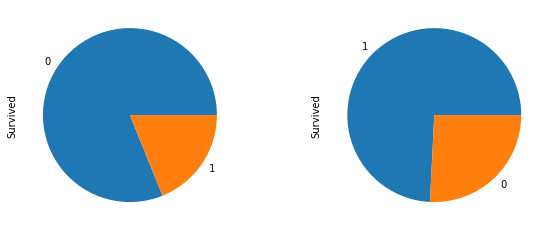

In [25]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
titanic.Survived[titanic['Sex'] == 'male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
titanic.Survived[titanic['Sex'] == 'female'].value_counts().plot(kind='pie')

# Let's see how the data looks like

In [26]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
from sklearn.preprocessing import LabelEncoder
titanic['Sex'] = LabelEncoder().fit_transform(titanic['Sex'])

In [28]:
titanic['Name'] = titanic['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = titanic['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [29]:
titanic['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = titanic.Age[(titanic["Age"] != -1) & (titanic['Name'] == title)].median()
    medians[title] = median
    
for index, row in titanic.iterrows():
    if row['Age'] == -1:
        titanic.loc[index, 'Age'] = medians[row['Name']]

titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


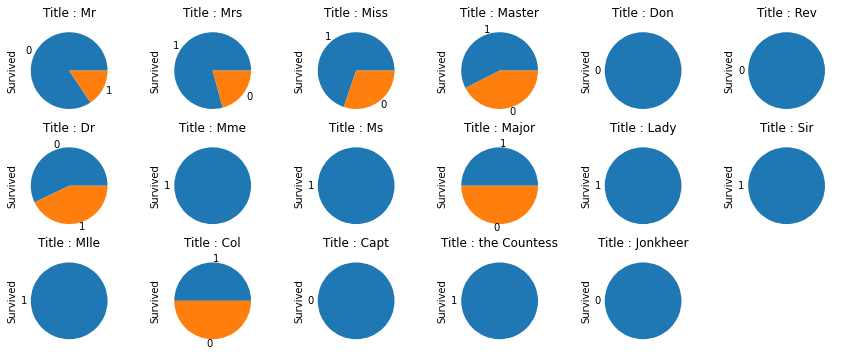

In [30]:
fig = plt.figure(figsize=(15,6))

i=1
for title in titanic['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    titanic.Survived[titanic['Name'] == title].value_counts().plot(kind='pie')
    i += 1

Transform the titles to numeric values such that the magnitude has a somewhat linear relationship with survival Alongwith transformation, the values need to be scaled down since some models like Neural nets are very sensitive to data which is not properly scaled

In [31]:
replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

titanic['Name'] = titanic['Name'].apply(lambda x: replacement.get(x))

from sklearn.preprocessing import StandardScaler
titanic['Name'] = StandardScaler().fit_transform(titanic['Name'].values.reshape(-1,1))

In [32]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,-0.797294,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,1.537975,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,1.070922,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,1.537975,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,-0.797294,1,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic.head()[['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']]

,Pclass,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,3,22.0,1,0,A/5 21171,NaN,S
1,1,38.0,1,0,PC 17599,C85,C
2,3,26.0,0,0,STON/O2. 3101282,NaN,S
3,1,35.0,1,0,113803,C123,S
4,3,35.0,0,0,373450,NaN,S


# Similar approach is needed for calculating missing fares according to the ticket class

In [34]:
titanic['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in titanic['Pclass'].unique():
    median = titanic.Fare[(titanic["Fare"] != -1) & (titanic['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in titanic.iterrows():
    if row['Fare'] == -1:
        titanic.loc[index, 'Fare'] = medians[row['Pclass']]
titanic['Fare'] = StandardScaler().fit_transform(titanic['Fare'].values.reshape(-1, 1))

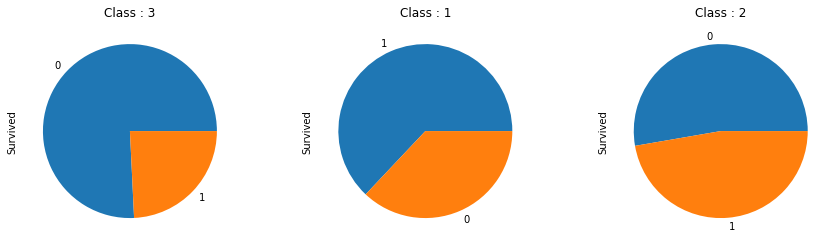

In [35]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in titanic['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    titanic.Survived[titanic['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1


In [36]:
titanic['Pclass'] = StandardScaler().fit_transform(titanic['Pclass'].values.reshape(-1, 1))

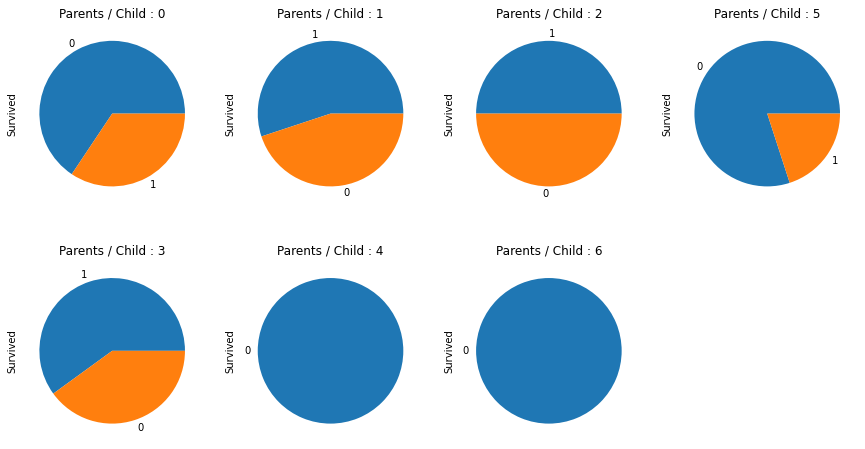

In [37]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in titanic['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    titanic.Survived[titanic['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [38]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
titanic['Parch'] = titanic['Parch'].apply(lambda x: replacement.get(x))
titanic['Parch'] = StandardScaler().fit_transform(titanic['Parch'].values.reshape(-1, 1))

In [39]:
titanic.drop('Ticket', axis=1, inplace=True)

In [40]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

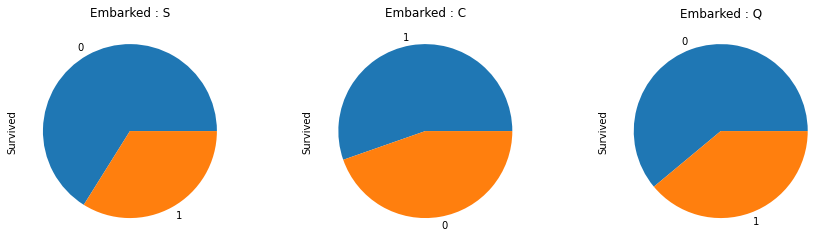

In [41]:
titanic['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,4))
i = 1
for embarked in titanic['Embarked'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Embarked : {}'.format(embarked))
    titanic.Survived[titanic['Embarked'] == embarked].value_counts().plot(kind='pie')
    i += 1

In [42]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

titanic['Embarked'] = titanic['Embarked'].apply(lambda x: replacement.get(x))
titanic['Embarked'] = StandardScaler().fit_transform(titanic['Embarked'].values.reshape(-1, 1))
titanic.head()['Embarked']

0   -0.585954
1    1.942303
2   -0.585954
3   -0.585954
4   -0.585954
Name: Embarked, dtype: float64

In [43]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

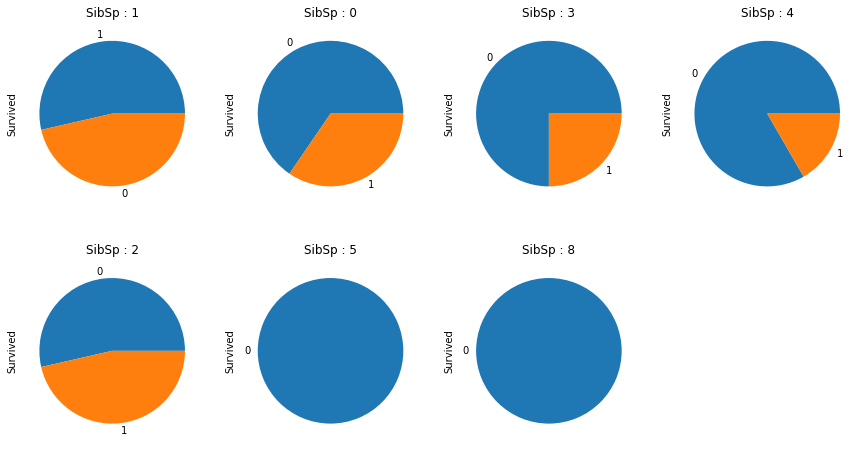

In [44]:
fig = plt.figure(figsize=(15,8))
i = 1
for sibsp in titanic['SibSp'].unique():
    fig.add_subplot(2, 4, i)
    plt.title('SibSp : {}'.format(sibsp))
    titanic.Survived[titanic['SibSp'] == sibsp].value_counts().plot(kind='pie')
    i += 1

In [45]:
replacement = {
    5: 0,
    8: 0,
    4: 1,
    3: 2,
    0: 3,
    2: 4,
    1: 5
}

titanic['SibSp'] = titanic['SibSp'].apply(lambda x: replacement.get(x))
titanic['SibSp'] = StandardScaler().fit_transform(titanic['SibSp'].values.reshape(-1, 1))
titanic.head()['SibSp']

0    1.576109
1    1.576109
2   -0.396241
3    1.576109
4   -0.396241
Name: SibSp, dtype: float64

In [46]:
titanic['Cabin'].fillna('U', inplace=True)
titanic['Cabin'] = titanic['Cabin'].apply(lambda x: x[0])
titanic['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

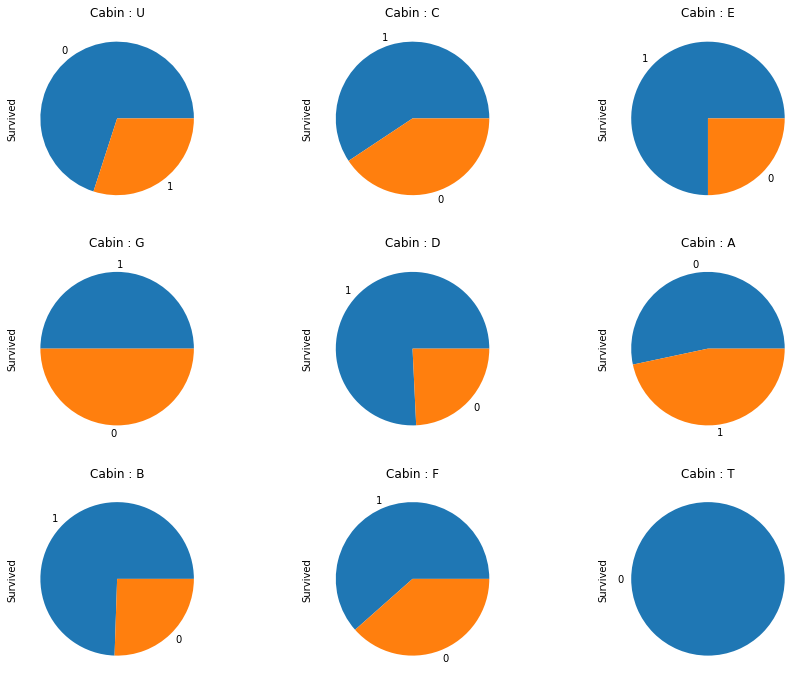

In [47]:
fig = plt.figure(figsize=(15,12))
i = 1
for cabin in titanic['Cabin'].unique():
    fig.add_subplot(3, 3, i)
    plt.title('Cabin : {}'.format(cabin))
    titanic.Survived[titanic['Cabin'] == cabin].value_counts().plot(kind='pie')
    i += 1

In [48]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

titanic['Cabin'] = titanic['Cabin'].apply(lambda x: replacement.get(x))
titanic['Cabin'] = StandardScaler().fit_transform(titanic['Cabin'].values.reshape(-1, 1))
titanic.head()['Cabin']

0   -0.494813
1    0.960231
2   -0.494813
3    0.960231
4   -0.494813
Name: Cabin, dtype: float64

In [49]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,22.0,1.576109,-0.468807,-0.502445,-0.494813,-0.585954
1,1,-1.566107,1.537975,0,38.0,1.576109,-0.468807,0.786845,0.960231,1.942303
2,1,0.827377,1.070922,0,26.0,-0.396241,-0.468807,-0.488854,-0.494813,-0.585954
3,1,-1.566107,1.537975,0,35.0,1.576109,-0.468807,0.420730,0.960231,-0.585954
4,0,0.827377,-0.797294,1,35.0,-0.396241,-0.468807,-0.486337,-0.494813,-0.585954


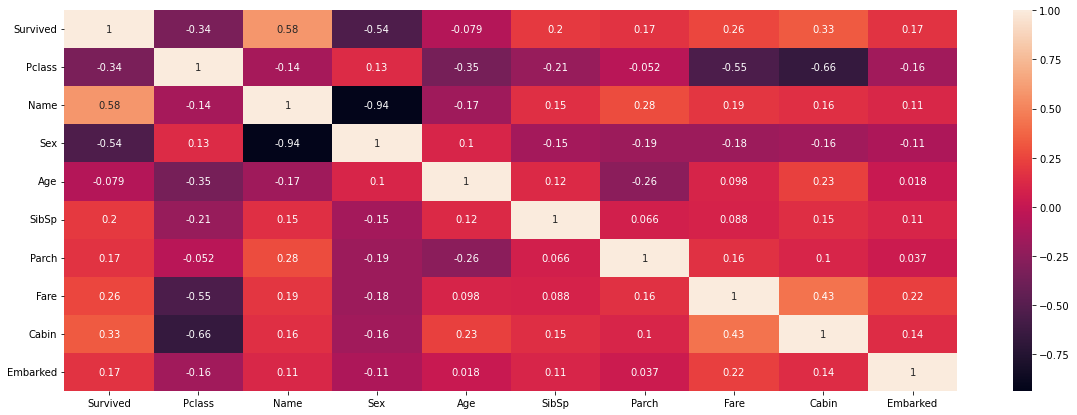

In [50]:
# correlation by visualization
plt.figure(figsize=[20,7])
# plot correlation
sns.heatmap(titanic.corr(),annot=True)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
survived = titanic['Survived']
titanic.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(titanic, survived, test_size=0.2, random_state=42)

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [54]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [55]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[90 15]
 [16 58]]


In [56]:
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)

In [57]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       105
           1       0.79      0.59      0.68        74

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.77      0.76       179



In [58]:
print(confusion_matrix(y_test,pred_svc))

[[93 12]
 [30 44]]


In [59]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)


In [60]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [61]:
print(confusion_matrix(y_test,pred_knn))

[[87 18]
 [21 53]]


In [62]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)

In [63]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [64]:
print(confusion_matrix(y_test,pred_dt))

[[89 16]
 [18 56]]


In [65]:
gb=GaussianProcessClassifier()
gb.fit(X_train,y_train)
pred_gb=gb.predict(X_test)

In [66]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [67]:
print(confusion_matrix(y_test,pred_gb))

[[88 17]
 [22 52]]


In [68]:
ab=AdaBoostClassifier()
ab.fit(X_train,y_train)
pred_ab=ab.predict(X_test)

In [69]:
print(classification_report(y_test,pred_ab))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       105
           1       0.78      0.80      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [70]:
print(confusion_matrix(y_test,pred_ab))

[[88 17]
 [15 59]]


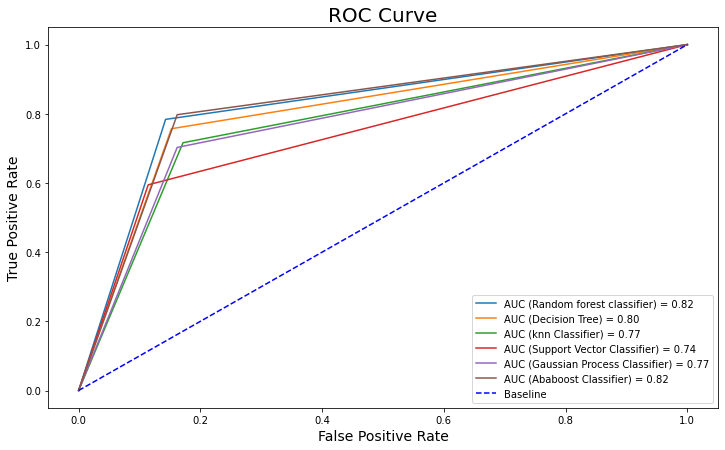

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_test.replace({'Good': 1, 'Bad': 0})
auc_rfc = roc_auc_score(y_test_int, pred_rfc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test_int, pred_rfc)

auc_dt = roc_auc_score(y_test_int, pred_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_int, pred_dt)

auc_knn = roc_auc_score(y_test_int, pred_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_int, pred_knn)

auc_svc = roc_auc_score(y_test_int, pred_svc)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test_int, pred_svc)

auc_gb = roc_auc_score(y_test_int, pred_gb)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test_int, pred_gb)

auc_ab = roc_auc_score(y_test_int, pred_ab)
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test_int, pred_ab)


plt.figure(figsize=(12, 7))
plt.plot(fpr_rfc, tpr_rfc, label=f'AUC (Random forest classifier) = {auc_rfc:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (knn Classifier) = {auc_knn:.2f}')
plt.plot(fpr_svc, tpr_svc, label=f'AUC (Support Vector Classifier) = {auc_svc:.2f}')
plt.plot(fpr_gb, tpr_gb, label=f'AUC (Gaussian Process Classifier) = {auc_gb:.2f}')
plt.plot(fpr_ab, tpr_ab, label=f'AUC (Ababoost Classifier) = {auc_ab:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

# SO OUT ALL THESE ML MODELS THE BEST ONE IS RANDOM FOREST CLASSIFIER,IF WE WANT TO INCREASE ITS EFFICIENCY THEN WE CAN USE GRIDCV .

In [72]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
#Best parameters for our svc model
grid_svc.best_params_

In [ ]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

# Cross Validation Score for random forest and ADABoost

In [ ]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc2 = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc2.mean()

In [ ]:
ab2 = cross_val_score(estimator = ab, X = X_train, y = y_train, cv = 10)
ab2.mean()

# SAVE THE MODEL

In [84]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8268156424581006


In [ ]:
+